In [49]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import ReLU, LeakyReLU, LSTM, RNN, Dense

In [ ]:
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [22]:
dataset

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


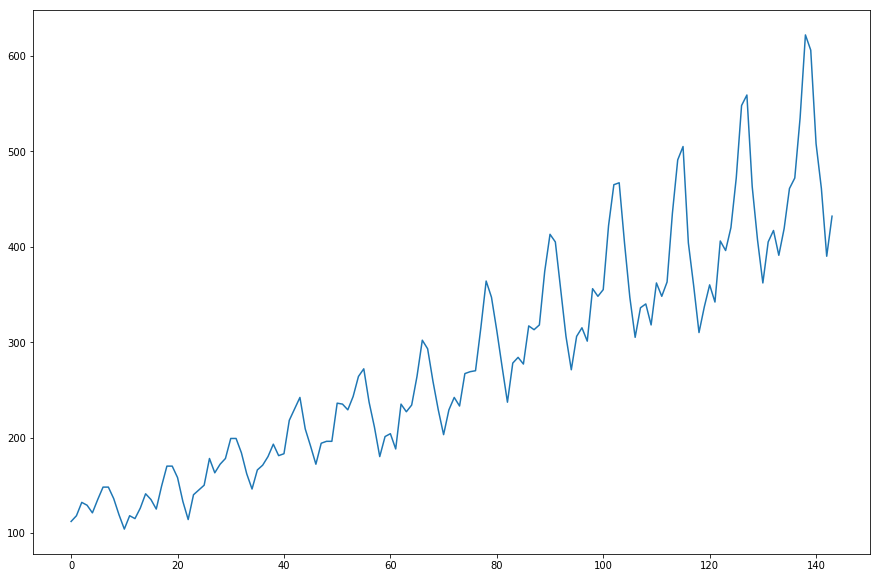

In [34]:
plt.figure(figsize=[15,10])
plt.plot(df)

In [23]:
np.random.seed(7)

In [24]:
df=dataset.values

In [27]:
df=df.astype('float32')

In [29]:
scaler=MinMaxScaler(feature_range=(0,1))

In [31]:
dataset=scaler.fit_transform(df)

In [32]:
df

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [35]:
train_size=int(len(df)*0.7)

In [36]:
test_size=len(df)-train_size

In [41]:
def create_dataset(dataset, look_back=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [42]:
trainX, trainY=create_dataset(train, look_back=1)

In [43]:
testX, testY=create_dataset(test, look_back=1)

In [56]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [50]:
look_back=1
model=Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
model.fit(trainX, trainY, epochs=100, batch_size=12,verbose=1)

Epoch 1/100
99/99 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 2/100
99/99 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 3/100
99/99 [==============================] - 0s 163us/step - loss: 0.0020
Epoch 4/100
99/99 [==============================] - 0s 173us/step - loss: 0.0020
Epoch 5/100
99/99 [==============================] - 0s 178us/step - loss: 0.0020
Epoch 6/100
99/99 [==============================] - 0s 181us/step - loss: 0.0020
Epoch 7/100
99/99 [==============================] - 0s 185us/step - loss: 0.0020
Epoch 8/100
99/99 [==============================] - 0s 180us/step - loss: 0.0020
Epoch 9/100
99/99 [==============================] - 0s 196us/step - loss: 0.0020
Epoch 10/100
99/99 [==============================] - 0s 185us/step - loss: 0.0020
Epoch 11/100
99/99 [==============================] - 0s 169us/step - loss: 0.0020
Epoch 12/100
99/99 [==============================] - 0s 186us/step - loss: 0.0020
Epoch 13/100
99

99/99 [==============================] - 0s 188us/step - loss: 0.0020
Epoch 100/100
99/99 [==============================] - 0s 189us/step - loss: 0.0020


In [67]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.10 RMSE
Test Score: 51.28 RMSE


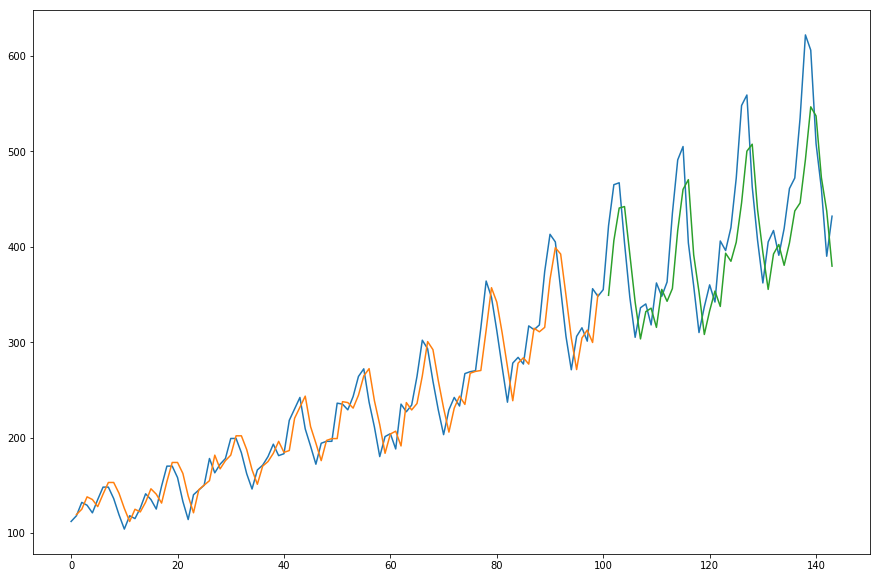

In [78]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset)+2, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[15,10])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()